# Funcion de error personalizada con Tensorflow

In [1]:
import tensorflow as tf

tf.__version__

'2.14.0'

## Huber loss

La función de pérdida de Huber describe la pena incurrida por un procedimiento de estimación f. Huber (1964) define la función de pérdida de forma fragmentada por:

$$ {\displaystyle L_{\delta }(y,h(x))={\begin{cases}{\frac {1}{2}}(y-h(x))^{2} \hspace{1.5cm} {\textrm {for}}|y-h(x)|\leq \delta ,\\\delta \,|y-h(x)|-{\frac {1}{2}}\delta ^{2} \hspace{5mm} {\textrm {otherwise.}}\end{cases}}}$$

Más información: https://en.wikipedia.org/wiki/Huber_loss

In [2]:
# Función que genera al función de pérdida de Huber
def create_huber(threshold=1.0):
    def huber_fn(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) <= threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = threshold * tf.abs(error) - threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    return huber_fn

A continuación se representa gráficamente la función de pérdida de Huber en función del threshold seleccionado

In [3]:
# El valor más habitual para la función de pérdida de Huber es 1.0
huber_fn = create_huber(1.0)

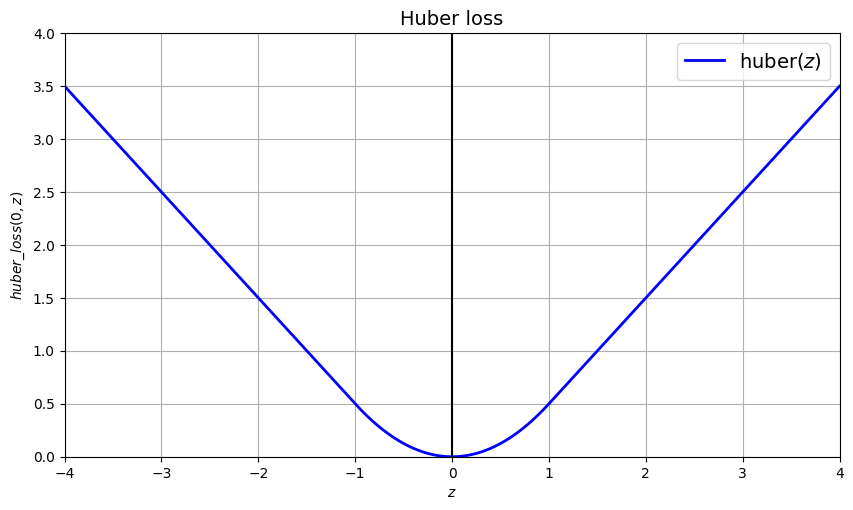

In [4]:
# Representación gráfica de la función de pérdida de Huber
from matplotlib import pyplot as plt
import numpy as np

plt.figure(figsize=(10, 5.5))

z = np.linspace(-4, 4, 200)

plt.plot(z, huber_fn(0, z), "b-", linewidth=2, label="huber($z$)")

plt.gca().axvline(x=0, color='k')
plt.axis([-4, 4, 0, 4])
plt.grid(True)
plt.xlabel("$z$")
plt.ylabel("$huber\_loss(0, z)$")
plt.legend(fontsize=14)
plt.title("Huber loss", fontsize=14)
plt.show()

## Entrenando una Red Neuronal Artificial con la nueva función de error

A continuación se pone en práctica la función de error definida en el apartado anterior en un ejercicio práctico. Para ello, se va a utilizar el caso de uso práctico de predicción del precio de una vivienda presentado en la sección de introducción a Keras

### Importando el conjunto de datos

In [5]:
from tensorflow.keras import datasets

In [6]:
boston_housing = datasets.boston_housing

In [7]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [8]:
import pandas as pd

features = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]

df_train = pd.DataFrame(np.column_stack([X_train, y_train]), columns=features)
df_train.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7
5,0.28392,0.0,7.38,0.0,0.493,5.708,74.3,4.7211,5.0,287.0,19.6,391.13,11.74,18.5
6,9.18702,0.0,18.10,0.0,0.700,5.536,100.0,1.5804,24.0,666.0,20.2,396.90,23.60,11.3
7,4.09740,0.0,19.58,0.0,0.871,5.468,100.0,1.4118,5.0,403.0,14.7,396.90,26.42,15.6
8,2.15505,0.0,19.58,0.0,0.871,5.628,100.0,1.5166,5.0,403.0,14.7,169.27,16.65,15.6
9,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.90,34.41,14.4


### División del conjunto de datos

In [9]:
from sklearn.model_selection import train_test_split

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

### Escalando el conjunto de datos

In [10]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train_prep = scaler.fit_transform(X_train)
X_val_prep = scaler.transform(X_val)
X_test_prep = scaler.transform(X_test)

### Definicion de la arquitectura de la Red Neuronal Artificial

In [11]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [12]:
network = models.Sequential()

network.add(layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]))
network.add(layers.Dense(10, activation='relu'))
network.add(layers.Dense(1))

In [13]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                420       
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 741 (2.89 KB)
Trainable params: 741 (2.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Entrenamiento de la Red Neuronal Artificial

#### Función de error utilizada en el ejercicio práctico de introducción a Keras

A continuación se muestra la representación gráfica de la evaluación de los valores resultantes de la función de error **_mean_squared_error_** durante el proceso de entrenamiento.

In [14]:
network.compile(
    loss='mean_squared_error',
    optimizer='adam',
    metrics=['mae']
               )

In [15]:
history = network.fit(X_train_prep, 
                      y_train, 
                      epochs=50, 
                      validation_data=(X_val_prep, y_val))

Epoch 1/50
13/13 [==============================] - 26s 383ms/step - loss: 616.9166 - mae: 23.1935 - val_loss: 606.6889 - val_mae: 22.9774
Epoch 2/50
13/13 [==============================] - 1s 75ms/step - loss: 595.9558 - mae: 22.7238 - val_loss: 588.8258 - val_mae: 22.5703
Epoch 3/50
13/13 [==============================] - 1s 59ms/step - loss: 577.2725 - mae: 22.3069 - val_loss: 572.9558 - val_mae: 22.2018
Epoch 4/50
13/13 [==============================] - 1s 53ms/step - loss: 560.2213 - mae: 21.9139 - val_loss: 557.8915 - val_mae: 21.8650
Epoch 5/50
13/13 [==============================] - 1s 74ms/step - loss: 542.5966 - mae: 21.5269 - val_loss: 542.2214 - val_mae: 21.5175
Epoch 6/50
13/13 [==============================] - 1s 79ms/step - loss: 524.3297 - mae: 21.1138 - val_loss: 523.9214 - val_mae: 21.1133
Epoch 7/50
13/13 [==============================] - 1s 74ms/step - loss: 503.3156 - mae: 20.6445 - val_loss: 502.7994 - val_mae: 20.6387
Epoch 8/50
13/13 [=====================

13/13 [==============================] - 1s 98ms/step - loss: 30.2134 - mae: 4.1986 - val_loss: 35.5203 - val_mae: 4.3032
Epoch 42/50
13/13 [==============================] - 1s 106ms/step - loss: 28.7324 - mae: 4.0819 - val_loss: 35.0263 - val_mae: 4.2171
Epoch 43/50
13/13 [==============================] - 1s 90ms/step - loss: 27.5046 - mae: 3.9890 - val_loss: 34.6678 - val_mae: 4.1636
Epoch 44/50
13/13 [==============================] - 1s 84ms/step - loss: 26.4258 - mae: 3.9046 - val_loss: 34.2274 - val_mae: 4.0798
Epoch 45/50
13/13 [==============================] - 1s 88ms/step - loss: 25.3206 - mae: 3.8180 - val_loss: 33.9377 - val_mae: 4.0198
Epoch 46/50
13/13 [==============================] - 1s 82ms/step - loss: 24.3347 - mae: 3.7243 - val_loss: 33.8041 - val_mae: 3.9755
Epoch 47/50
13/13 [==============================] - 1s 57ms/step - loss: 23.5040 - mae: 3.6481 - val_loss: 33.4196 - val_mae: 3.9274
Epoch 48/50
13/13 [==============================] - 1s 83ms/step - loss:

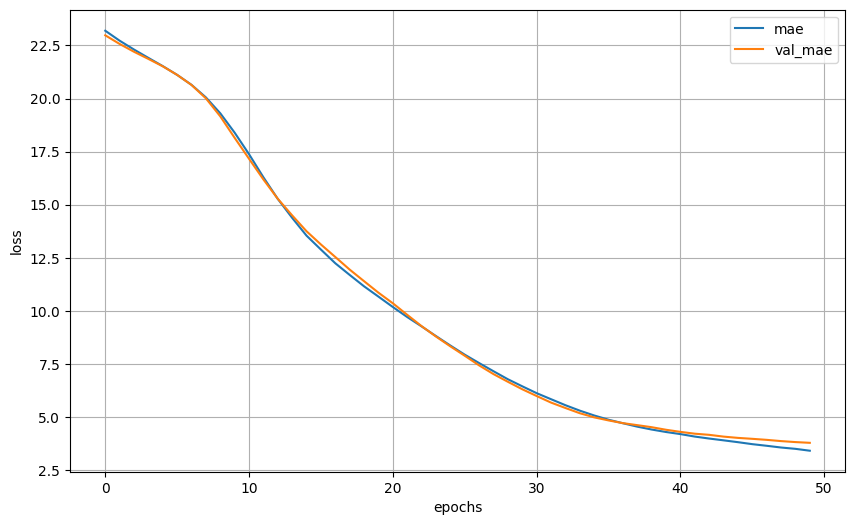

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history)[['mae', 'val_mae']].plot(figsize=(10, 6))
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

#### Evaluación de los resultados

In [17]:
test_loss, test_mae = network.evaluate(X_test_prep, y_test)

2/2 [==============================] - 1s 20ms/step - loss: 24.7042 - mae: 3.9586


In [18]:
print('test_mae:', test_mae)

test_mae: 3.9586355686187744


#### Función de error de Huber

A continuación se muestra la representación gráfica de la evaluación de los valores resultantes de la función de error de **_huber_** durante el proceso de entrenamiento.

In [19]:
network = models.Sequential()

network.add(layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]))
network.add(layers.Dense(10, activation='relu'))
network.add(layers.Dense(1))

In [20]:
network.compile(
    loss=create_huber(1.0),
    optimizer='adam',
    metrics=['mae']
               )

In [21]:
history = network.fit(X_train_prep, 
                      y_train, 
                      epochs=50, 
                      validation_data=(X_val_prep, y_val))

Epoch 1/50
13/13 [==============================] - 22s 318ms/step - loss: 21.3332 - mae: 21.8332 - val_loss: 21.1484 - val_mae: 21.6484
Epoch 2/50
13/13 [==============================] - 1s 61ms/step - loss: 20.8242 - mae: 21.3242 - val_loss: 20.6444 - val_mae: 21.1444
Epoch 3/50
13/13 [==============================] - 1s 75ms/step - loss: 20.2371 - mae: 20.7371 - val_loss: 20.0510 - val_mae: 20.5510
Epoch 4/50
13/13 [==============================] - 1s 52ms/step - loss: 19.5442 - mae: 20.0442 - val_loss: 19.3064 - val_mae: 19.8016
Epoch 5/50
13/13 [==============================] - 1s 48ms/step - loss: 18.6933 - mae: 19.1918 - val_loss: 18.5373 - val_mae: 19.0294
Epoch 6/50
13/13 [==============================] - 1s 63ms/step - loss: 17.8053 - mae: 18.3021 - val_loss: 17.7397 - val_mae: 18.2397
Epoch 7/50
13/13 [==============================] - 1s 41ms/step - loss: 16.9270 - mae: 17.4250 - val_loss: 16.7348 - val_mae: 17.2348
Epoch 8/50
13/13 [==============================] - 1

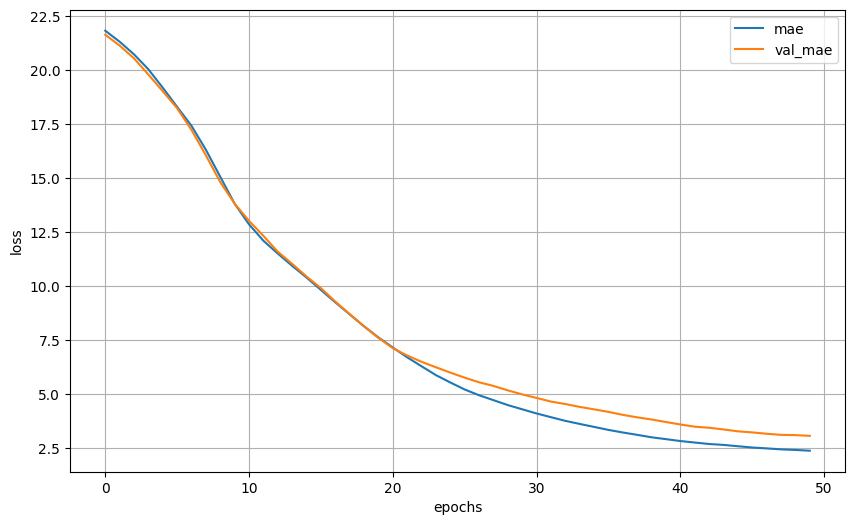

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history)[['mae', 'val_mae']].plot(figsize=(10, 6))
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

#### Evaluación de los resultados

In [23]:
test_loss, test_mae = network.evaluate(X_test_prep, y_test)

2/2 [==============================] - 1s 27ms/step - loss: 2.3017 - mae: 2.7698


In [24]:
print('test_mae:', test_mae)

test_mae: 2.769777774810791


## Guardando el modelo en disco con objetos personalizados

Cuando nuestro modelo contiene algún componente personalizado, debemos realizar el siguiente procedimiento para almacenar el modelo en disco e importarlo cuando sea necesario

In [25]:
# Guardamos el modelo en disco
network.save("modelos/25/modelo_huber_loss.h5")

c:\Users\enric\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [26]:
# Importamos el modelo previamente guardado en disco
network2 = tf.keras.models.load_model("modelos/25/modelo_huber_loss.h5",
                                      custom_objects={"huber_fn": create_huber(1.0)})

In [27]:
history = network2.fit(X_train_prep, 
                      y_train, 
                      epochs=2, 
                      validation_data=(X_val_prep, y_val))

Epoch 1/2
13/13 [==============================] - 14s 248ms/step - loss: 1.9086 - mae: 2.3447 - val_loss: 2.5544 - val_mae: 3.0156
Epoch 2/2
13/13 [==============================] - 0s 37ms/step - loss: 1.8938 - mae: 2.3287 - val_loss: 2.5711 - val_mae: 3.0319
